In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
file_sizes = []
for i in range(1, 37):
    statinfo = os.stat('samples/' + str(i))
    file_sizes.append(statinfo.st_size)
statinfo

os.stat_result(st_mode=33261, st_ino=8595811680, st_dev=16777221, st_nlink=1, st_uid=501, st_gid=20, st_size=1432256, st_atime=1520585864, st_mtime=1518659984, st_ctime=1521323027)

In [4]:
file_sz = np.array(file_sizes)

In [5]:
freqs = pd.read_csv('cmake-build-debug/freqs.csv')
entropy = pd.read_csv('csvs/entropy.csv')
compress = pd.read_csv('csvs/compress_full_fixed.csv')
coef = pd.read_csv('csvs/coefs_full.csv')

In [18]:
# compress = compress.drop(compress.columns[0], axis=1)
compress.head(2)

,Unnamed: 0,type,name,comp,decomp
0,0,huff,1,1.218271e+09,1.914754e+10
1,1,huff,2,7.725959e+08,2.495938e+09


In [21]:
compress.shape

(180, 5)

In [19]:
entropy.head(2)

,name,entropy
0,1,0.999290
1,2,0.713482


In [22]:
entropy.shape

(36, 2)

In [91]:
# coef = coef.drop(coef.columns[0], axis=1)
coef

,Unnamed: 0,type,name,k
0,0,huff,1,1.000467
1,1,huff,2,0.579361
2,2,huff,3,0.971544
3,3,huff,4,1.007811
4,4,huff,5,0.569410
5,5,huff,6,0.580053
6,6,huff,7,0.971410
7,7,huff,8,1.000431
8,8,huff,9,1.000053
9,9,huff,10,0.897395


In [ ]:
# ent_comp_df = pd.concat

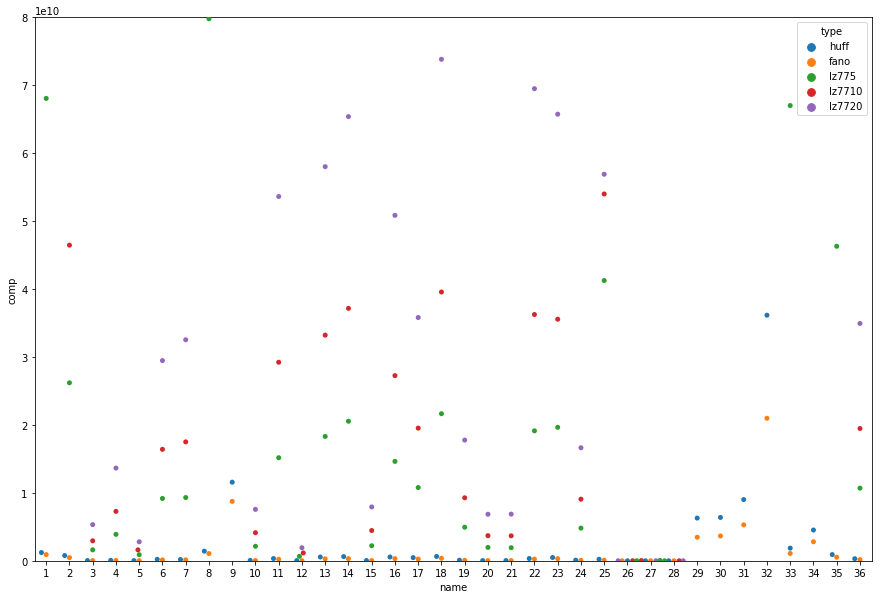

In [35]:
plt.figure(figsize=(15,10))
# sns.regplot(x=compress['name'], y=compress['comp'], hue=compress['type'])
# plt.scatter(x=compress['name'], y=compress['comp'],)
plt.ylim((0, 0.8e11))
sns.swarmplot(x=compress['name'], y=compress['comp'], hue=compress['type'])

In [94]:
mean_comp_time = compress.groupby('name')['comp'].mean()
median_comp_time = compress.groupby('name')['comp'].median()
median_decomp_time = compress.groupby('name')['decomp'].median()
median_coef = coef.groupby('name')['k'].median()
ent_comp = pd.concat([entropy, median_comp_time, median_decomp_time, median_coef], axis=1)

In [95]:
ent_comp.comp = ent_comp.comp.shift(-1)
ent_comp.decomp = ent_comp.decomp.shift(-1)
ent_comp.k = ent_comp.k.shift(-1)
ent_comp = ent_comp.drop(36)
ent_comp

,name,entropy,comp,decomp,k
0,1.0,0.999290,6.804760e+10,5.410352e+08,2.189236
1,2.0,0.713482,2.619900e+10,2.717149e+08,0.668077
2,3.0,0.950573,1.608561e+09,1.283755e+07,1.698636
3,4.0,0.997555,3.892674e+09,3.068194e+07,2.168379
4,5.0,0.694124,8.986262e+08,1.638326e+07,0.774141
5,6.0,0.675544,9.172424e+09,8.052519e+07,0.855671
6,7.0,0.963603,9.312255e+09,7.871909e+07,1.779341
7,8.0,0.999694,7.977251e+10,5.972719e+08,2.182424
8,9.0,0.999302,6.398011e+11,5.056986e+09,2.183503
9,10.0,0.883510,2.139675e+09,1.964210e+07,1.299689


In [84]:
ent_comp.name = ent_comp.name.astype(int)

In [85]:
ent_comp

,name,entropy,comp,decomp
0,1,0.999290,6.804760e+10,5.410352e+08
1,2,0.713482,2.619900e+10,2.717149e+08
2,3,0.950573,1.608561e+09,1.283755e+07
3,4,0.997555,3.892674e+09,3.068194e+07
4,5,0.694124,8.986262e+08,1.638326e+07
5,6,0.675544,9.172424e+09,8.052519e+07
6,7,0.963603,9.312255e+09,7.871909e+07
7,8,0.999694,7.977251e+10,5.972719e+08
8,9,0.999302,6.398011e+11,5.056986e+09
9,10,0.883510,2.139675e+09,1.964210e+07


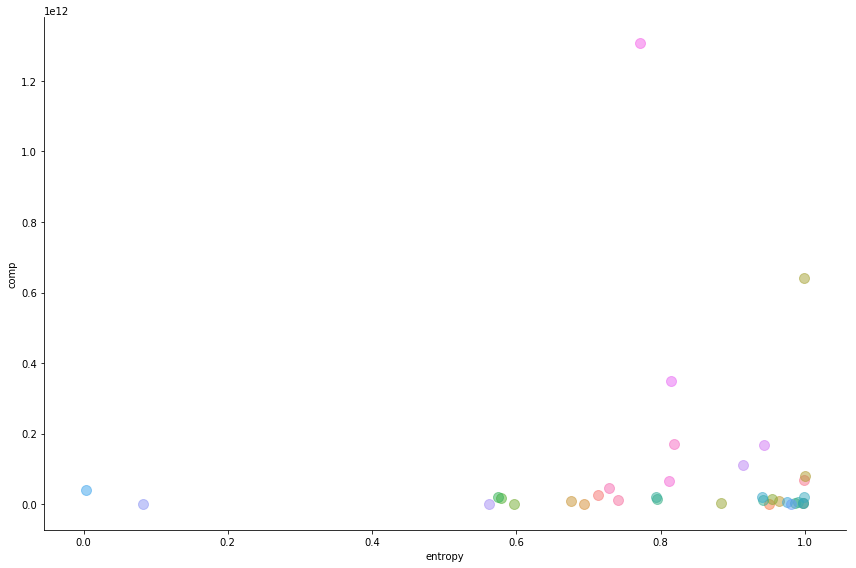

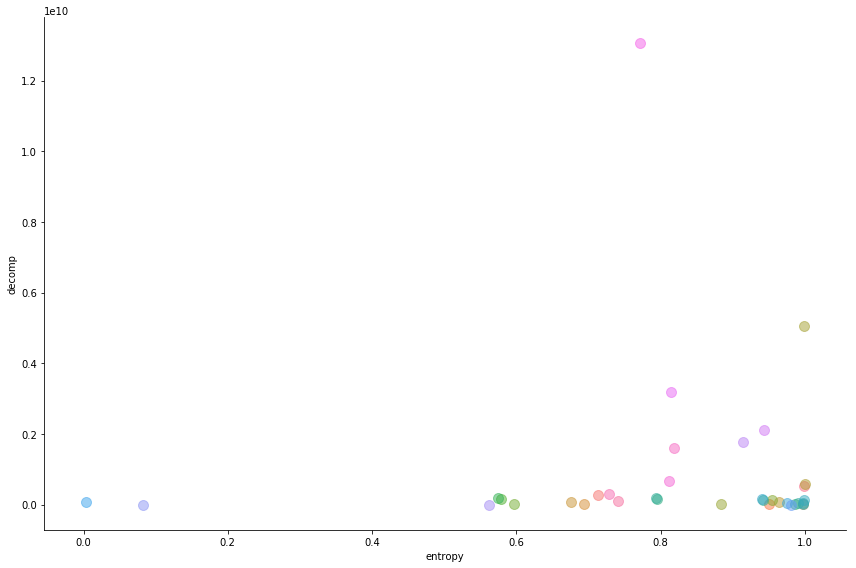

In [88]:
plt.figure(figsize=(12,10))
# sns.regplot(x=entropy['entropy'], y=mean_comp_time)
sns.lmplot(x='entropy', y='comp', data=ent_comp, hue='name', fit_reg=False, legend=False, size=8, aspect=1.5, scatter_kws={"s": 100, 'alpha':0.5})



In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors

In [195]:
print(ent_comp['entropy'][27:].argmin())
print(ent_comp['entropy'].argmax())
# print(ent_comp['k'][:24]
# print(ent_comp['k'][7])

27
7


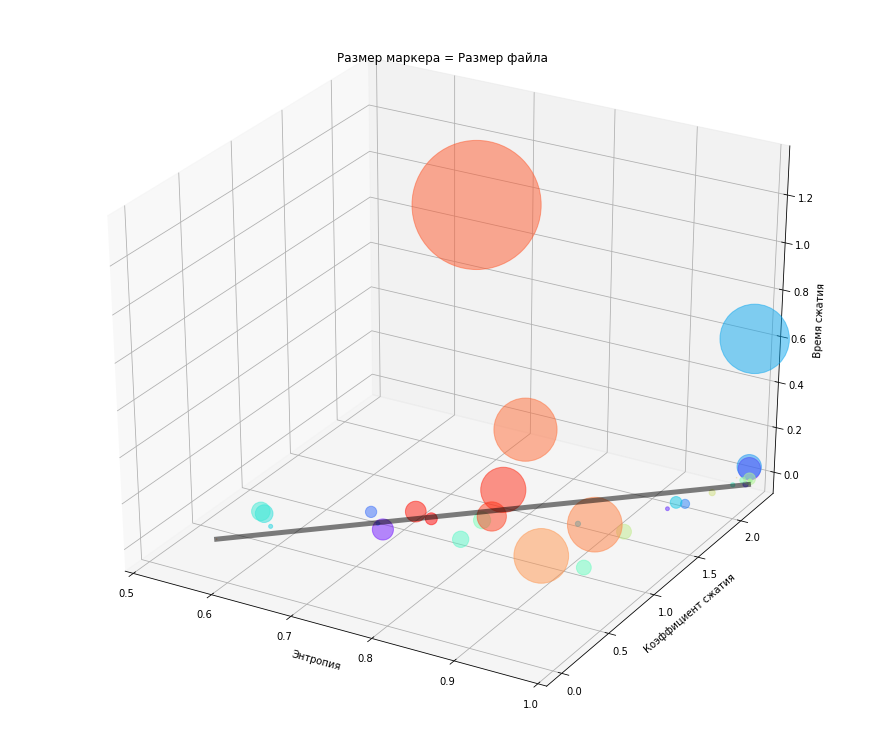

In [202]:
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
# for i in range(36):
ax.scatter( ent_comp['entropy'], ent_comp['k'], ent_comp['comp'] / 1e12, s=file_sz / 10000, alpha=0.5, c=cm.rainbow(np.linspace(0, 1, 36)))
ax.plot([ent_comp['entropy'][27],ent_comp['entropy'].max()] , [ent_comp['k'][27], ent_comp['k'][7]], 0, linewidth=5, c='black', alpha=0.5)
ax.set_ylabel('Коэффициент сжатия')
ax.set_xlabel('Энтропия')
ax.set_zlabel('Время сжатия')
ax.set_title('Размер маркера = Размер файла')
ax.set_xlim((0.5, 1))
fig.savefig('graphs/entropy_coef_compTime_size_3D.png', dpi=200)

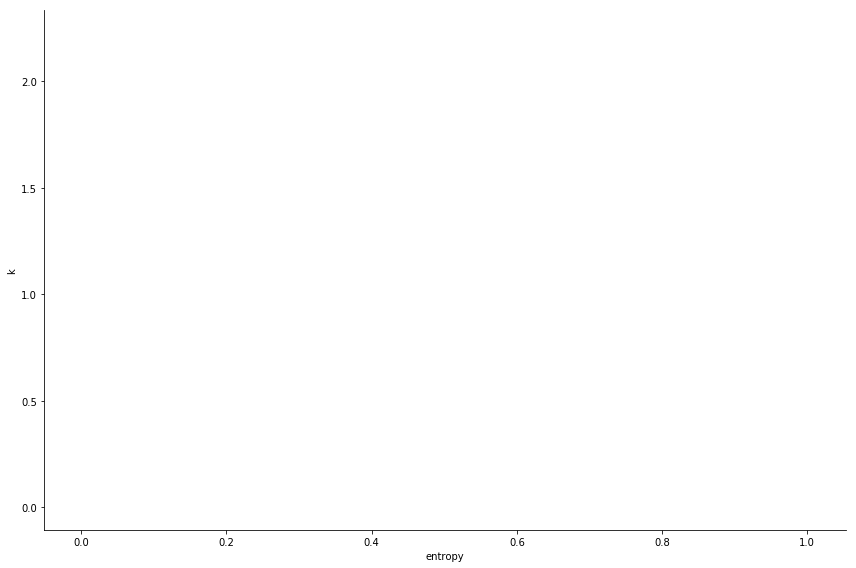

In [133]:
sns.lmplot(x='entropy', y='k', data=ent_comp, hue='name', fit_reg=False, legend=False, size=8, aspect=1.5, scatter_kws={"s": [n**2 for n in range(36)], 'alpha':0.5})




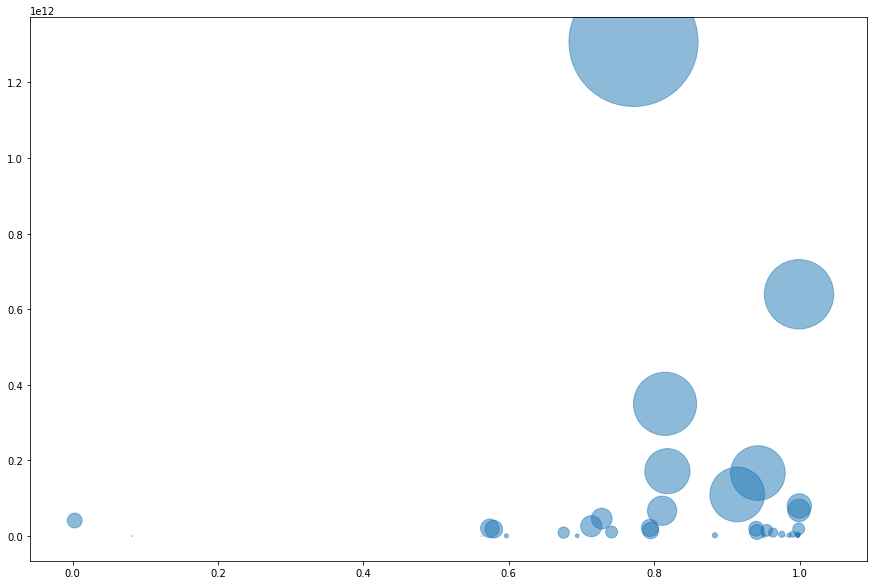

In [203]:
plt.figure(figsize=(15,10))
x = ent_comp['entropy']
y = ent_comp['comp']
s = file_sz / 10000 #[5 * n for n in range(len(x))]
plt.scatter(x,y,s=s, alpha=0.5)
plt.show()

In [ ]:
# каждый алгоритм - каждый файл - коэф сжатия

In [11]:
coef.shape

(180, 4)

In [13]:
coef.head()

,Unnamed: 0,type,name,k
0,0,huff,1,1.000467
1,1,huff,2,0.579361
2,2,huff,3,0.971544
3,3,huff,4,1.007811
4,4,huff,5,0.569410


In [12]:
entropy.shape

(36, 2)

In [14]:
entropy.head()

,name,entropy
0,1,0.999290
1,2,0.713482
2,3,0.950573
3,4,0.997555
4,5,0.694124


In [45]:
conc_entropy = pd.concat([entropy] * 5)

In [46]:
conc_entropy = conc_entropy.reset_index()
conc_entropy

,index,name,entropy
0,0,1,0.999290
1,1,2,0.713482
2,2,3,0.950573
3,3,4,0.997555
4,4,5,0.694124
5,5,6,0.675544
6,6,7,0.963603
7,7,8,0.999694
8,8,9,0.999302
9,9,10,0.883510


['lz7720', 'fano', 'lz7710', 'lz775', 'huff']
lz7720
fano
lz7710
lz775
huff


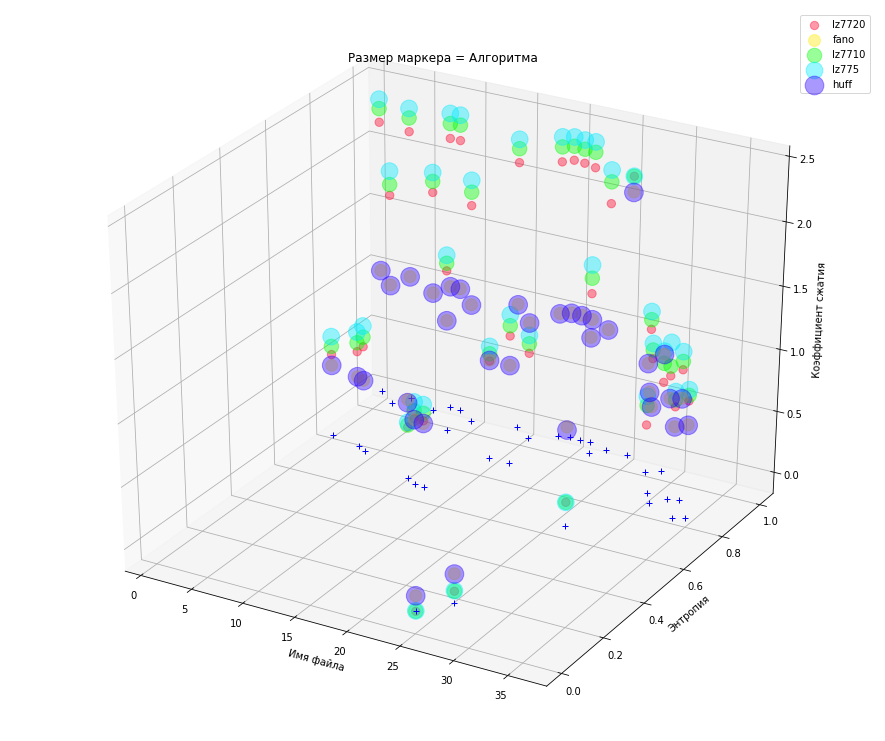

In [106]:
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
# for i in range(36): s=file_sz / 10000 c=cm.rainbow(np.linspace(0, 1, 36))

x = coef['name']
y = conc_entropy['entropy']
z = coef['k']
uniq = list(set(coef['type']))
print(uniq)

hot = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=hot)

for i in range(len(uniq)):
    indx = coef['type'] == uniq[i]
    print(uniq[i])
#     print(coef['name'][indx])
#     print(conc_entropy[indx]['entropy'])
#     plt.scatter([indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])
    ax.scatter( x[indx], y[indx], z[indx], alpha=0.4, s=(i + 1) * 70, color=scalarMap.to_rgba(i), label=uniq[i])
#     ax.plot(x[indx], z[indx], 'r+', zdir='y', color=scalarMap.to_rgba(i))
#     ax.scatter(y[indx], z[indx], zdir='x', color=scalarMap.to_rgba(i))
#     ax.plot(x[indx], y[indx], 'k+', zdir='z', color=scalarMap.to_rgba(i))
#     ax.plot(x[indx], y[indx], z[indx])
ax.legend()
ax.plot(x[:36], y[:36], 'k+', zdir='z', color='b')
# ax.plot(x[:36], y[:36], z[:36])
# ax.plot(x[180 - 3 * 36:180 - 2 * 36], y[180 - 3 * 36:180 - 2 * 36], z[180 - 3 * 36:180 - 2 * 36])
ax.set_ylabel('Энтропия')
ax.set_xlabel('Имя файла')
ax.set_zlabel('Коэффициент сжатия')
ax.set_title('Размер маркера = Алгоритма')
fig.savefig('graphs/entropy_coef_file_3D.png', dpi=200)